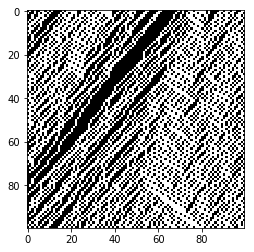

In [4]:
#import random 
import numpy as np
import matplotlib.pyplot as plt

R = 100 #Länge d. str.
t = 100#Zeit/iterationen
D =0.5#dichte
P = 0.25
vmax = 5

file = open('vd.txt','w')

auto_anzahl=int(R*D)
anfangszustand = [0]*(R-auto_anzahl)+[1]* auto_anzahl #wir haben leere plätze als 0 und autos als 1 definiert, liste
np.random.shuffle(anfangszustand) #anfangszustand zufällig, elemente in liste werden vertauscht

A=np.zeros((t,R))
for x in range(R-1):
    if anfangszustand[x]==1:
        A[0][x]=1

for i in range(t-1):
    v_ges=0
    for x in range(R-1):
        if A[i][x]==1:
            v=1
            d=1
            
            while A[i][(x+d)%R]==0:
                d+=1
               # if A[i][(x+d)%R]==1:
                #    break
                
            if d>v+1 and v<vmax:
                v+=1
            if v>0 and d<=v:
                v=d-1
            if v>0 and np.random.rand()<P:
                v-=1
            if v<0:
                v=0
            if A[i][R-1]==1: #auto springt an den anfang der straße wenn es am ende angelangt ist
                A[i+1][0]=1
            v_ges+=v
            A[i+1][(x+v)%R]=1
        vges_float=float(v_ges)
        #print (vges_float)
        v_mittel=float(vges_float/auto_anzahl)
    #print(v_mittel)
    file.write(str(v_mittel))
    file.write('\n')

file.close()

plt.imshow(A, cmap="Greys", interpolation="nearest")
plt.show()


In [168]:
a=[0]*R
for x in range(R):
    if A[99][x]==1:
        a[x]=1
print(a.count(1))
print(auto_anzahl)


45
50


In [8]:
#Fluss berechnen
file=open('fluss.txt','w')

for x in range(R):
    F=0
    for i in range(t-1):
        if A[i][x]==1 and A[i+1][x]==0 or A[i][x]==0 and A[i+1][x]==1:
            F+=1
        F_float=float(F)
        fluss= float(F_float/t)
    #print(fluss) 
    file.write(str(fluss))
    file.write('\n')

file.close()

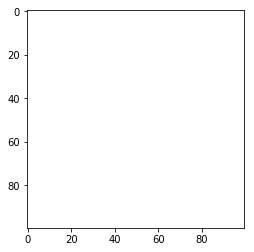

In [35]:

T=np.zeros((t,R,2))
for x in range(R-1):
    if anfangszustand[x]==1:
        T[0][x][0]=1

for i in range(t-1):
    for x in range(R-1):
        for j in range(1):
            if T[i][x][0]==1:
           
                v=1
                d1=1
                d2=1
                while T[i][(x+d1)%R][0]==0:
                    d1+=1
                    if T[i][(x+d1)%R][0]==1:
                        break
                while T[i][(x+d2)%R][1]==0:
                    d2+=1
                    if T[i][(x+d2)%R][1]==1:
                        break
                if d1>v+1 and v<vmax:
                    v+=1
                if v>0 and d1<=v and d2<=v:
                    v=d1-1
                if v>0 and np.random.rand()<P:
                    v-=1
                if v<0:
                    v=0
                if T[i][R-1][j]==1: #auto springt an den anfang der straße wenn es am ende angelangt ist
                    T[i+1][0][j]=1
                
            if T[i][x][1]==1:
                v=1
                if d2>v+1 and v<vmax:
                    v+=1
                if T[i][(x+v)%R][0]<d1:
                    
                
            
            T[i+1][(x+v)%R][j]=1


                
T1=np.zeros((t,R))
T2=np.zeros((t,R))
for i in range(t):
    for x in range(R-1):
        if T[i][x][0]==1:
            T1[i][x]=1
        if T[i][x][1]==1:
            T2[i][x]=1


plt.imshow(T1, cmap="Greys", interpolation="nearest")
plt.show()



In [25]:
print(T)

[[[0. 1. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 1. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 1. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
